In [1]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [10]:
# Load the data
df = pd.read_csv("EmployedResumes.csv")

# Convert categorical string columns to numeric labels AND show mappings
for col in ['Education_Level', 'Position_Level']:
    df[col] = df[col].astype('category')
    mapping = dict(enumerate(df[col].cat.categories))
    print(f"{col} mapping:")
    for code, label in mapping.items():
        print(f"  {code} → {label}")
    print()  # blank line
    df[col] = df[col].cat.codes

df.head()


Education_Level mapping:
  0 → Bachelor's
  1 → Master's
  2 → PhD

Position_Level mapping:
  0 → Entry
  1 → Mid
  2 → Senior



,Applicant_ID,Sex,Employment_Gaps,College_Club,Resume_Keywords,Education_Level,Years_Experience,Skills,Position_Level,Certifications,Programming_Languages,Project_Count,GPA,Hired
0,415,Male,0,Coding Society,achieved,1,8.0,system architecture,1,Google Analytics Certified,Python,4.0,3.35,1
1,606,Male,0,Coding Society,achieved,0,9.0,software engineering,0,Certified Scrum Master,C++,8.0,3.09,1
2,750,Male,0,Tech Club,innovated,1,3.0,data analysis,2,Certified Scrum Master,Java,7.0,3.15,0
3,744,Male,0,Tech Club,strategic,0,7.0,customer service,0,Certified Scrum Master,Java,5.0,3.95,1
4,926,Female,0,Tech Club,organized,0,0.0,system architecture,0,Google Analytics Certified,Python,4.0,3.83,0


Naive Bayes Evaluation Metrics:
Accuracy:  0.8800
Precision: 0.8940
Recall:    0.8710
F1 Score:  0.8824

Confusion Matrix:
[[129  16]
 [ 20 135]]


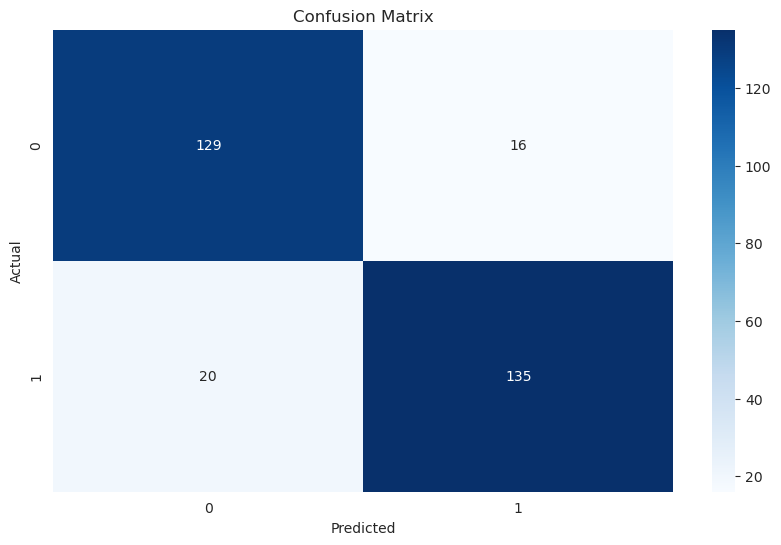

In [9]:
# Select features and target
X = df[['Years_Experience', 'Education_Level', 'Position_Level']]
y = df['Hired']

# Split into 70/30 train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Naive Bayes Evaluation Metrics:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Optional: visualize confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
print("Education_Level mapping:\n0 → Bachelor's\n1 → Master's\n2 → PhD\nPosition_Level mapping:\n0 → Entry\n1 → Mid\n2 → Senior")
years = float(input("Years of Experience:"))
ed = int(input("Education Code:"))
pos = int(input("Position Code:"))

new_applicant = np.array([[years, ed, pos]])   # Years, Education_Code, Position_Code

prediction = model.predict(new_applicant)[0]
probability = model.predict_proba(new_applicant)[0][1]

print("Prediction (1=hired, 0=not hired):", prediction)
print(f"Confidence applicant will be hired: {probability:.4f}")


Education_Level mapping:
0 → Bachelor's
1 → Master's
2 → PhD
Position_Level mapping:
0 → Entry
1 → Mid
2 → Senior


Years of Experience: 10
Education Code: 2
Position Code: 2


Prediction (1=hired, 0=not hired): 1
Confidence applicant will be hired: 0.9880


/opt/conda/envs/anaconda-2025.12-py312/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/opt/conda/envs/anaconda-2025.12-py312/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
